# Introduction

Accurate rainfall forecasts are essential for planning water allocation, storage, and distribution strategies. It is crucial for their operations, to plan water allocation strategies and reservoir management more effectively. The goal of this project is to develop a machine learning model to forecast rainfall for upcoming months in Mumbai, India. By anticipating rainfall patterns, they can optimize their operations and minimize costs while ensuring a consistent water supply throughout the year.

# Import Required Libiaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load The Data Set

In [3]:
#load the data set
df= pd.read_csv("C:\\Users\\ragul\\project\\mumbai-monthly-rains.csv")

In [4]:
df

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,0.000000,0.000000,0.000000,0.000000,1.043890,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.000000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.000000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.000000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531


# Data Profilling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,121.0,1961.000000,35.073732,1901.000000,1931.000000,1961.000000,1991.000000,2021.000000
Jan,121.0,1.567235,6.462247,0.000000,0.000000,0.000000,0.000000,51.348290
Feb,121.0,0.929358,3.077050,0.000000,0.000000,0.000000,0.152298,21.107118
Mar,121.0,0.869231,2.890032,0.000000,0.000000,0.000000,0.000000,18.252996
April,121.0,1.428458,7.371307,0.000000,0.000000,0.000000,0.194165,75.541818
May,121.0,18.183632,48.628812,0.000000,0.000000,0.355001,4.208322,234.392757
June,121.0,517.854402,251.067016,61.058662,324.094617,482.449872,678.040770,1219.518576
July,121.0,757.407412,285.836188,103.209194,540.745923,788.403637,942.616099,1358.833554
Aug,121.0,465.600818,249.072915,87.493370,268.002392,445.870342,604.372615,1200.956558
Sept,121.0,312.885747,205.135368,36.313545,149.584208,269.276549,398.645218,987.796660


In [7]:
df.nunique()

Year     121
Jan       31
Feb       30
Mar       28
April     34
May       67
June     121
July     121
Aug      121
Sept     121
Oct      114
Nov       72
Dec       33
Total    121
dtype: int64

# Exploaring Data Analysis

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends. Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variable.Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contribute Cancelation predection.

In [8]:
# check the first 5 rows
df.head(5)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [9]:
# check the last 5 rows
df.tail(5)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
116,2017,0.000000,0.000000,0.000000,0.000000,1.04389,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.00000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.00000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.00000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531
120,2021,0.727235,0.825876,0.010660,0.002233,219.07506,796.307275,981.146645,323.199896,601.247517,36.040432,25.156942,90.044602,3073.784373


In [10]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Total'],
      dtype='object')

# Checking the duplicated & Null Values

Before moving further with the analysis, it is essential to ensure the integrity of our dataset. We will begin by examining for any missing values and identifying potential duplicate.This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning detectiont.

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


Our dataset does not have any null values and duplicates.Now we can proceed with confidence, knowing that our dataset is ready for further analysis.

# Data Visualization

In [14]:
# Calculate annual averages and other statistics
annual_avg = df['Total'].mean()
annual_max = df['Total'].max()
annual_min = df['Total'].min()

print(f"Annual Average Rainfall: {annual_avg:.2f} mm")
print(f"Maximum Annual Rainfall: {annual_max:.2f} mm")
print(f"Minimum Annual Rainfall: {annual_min:.2f} mm")

Annual Average Rainfall: 2168.12 mm
Maximum Annual Rainfall: 3563.26 mm
Minimum Annual Rainfall: 1058.84 mm


#### 1. Total Rainfall Over the Year

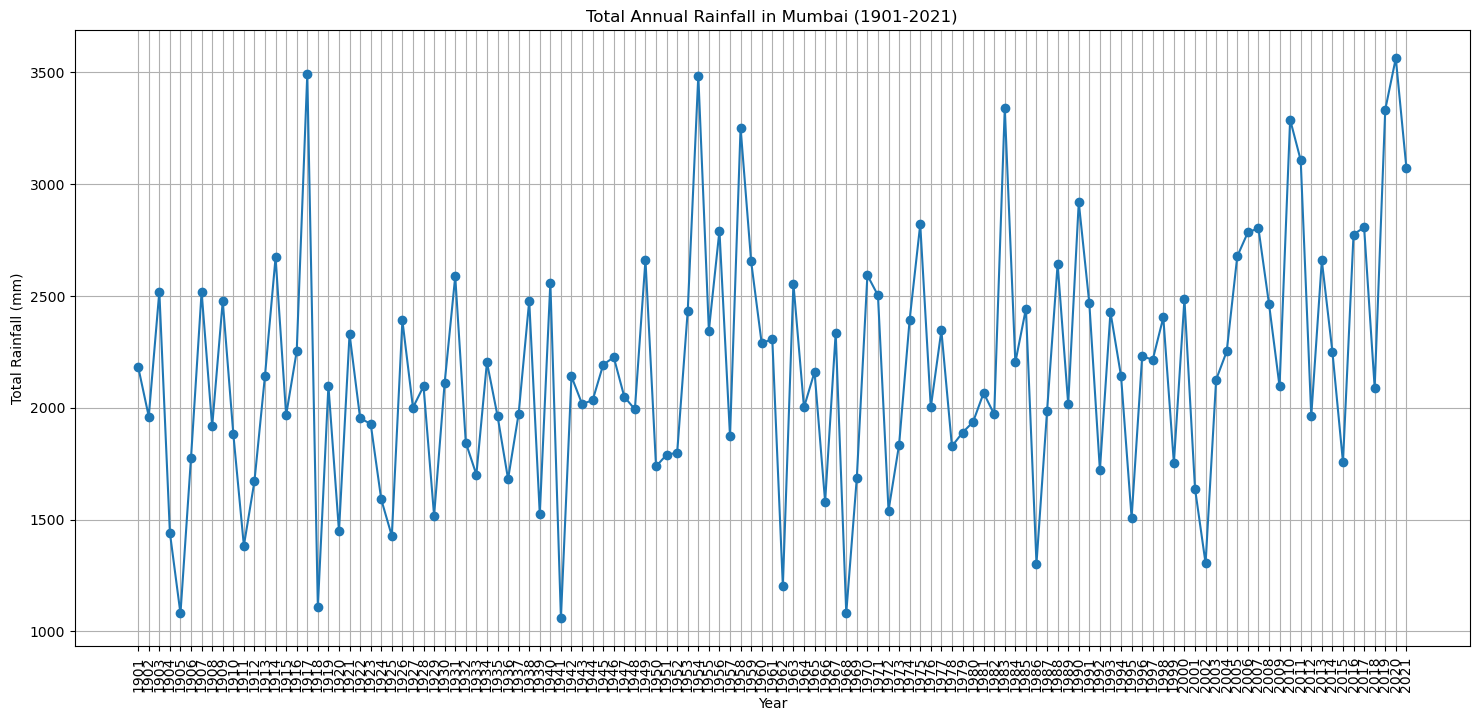

In [15]:
# Plotting Total Rainfall Over the Years
plt.figure(figsize=(18, 8))
plt.plot(df['Year'], df['Total'], marker='o')
plt.title('Total Annual Rainfall in Mumbai (1901-2021)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.xticks(df['Year'], rotation=90)
plt.show()

#### 2. Monthly Rainfall Analysis

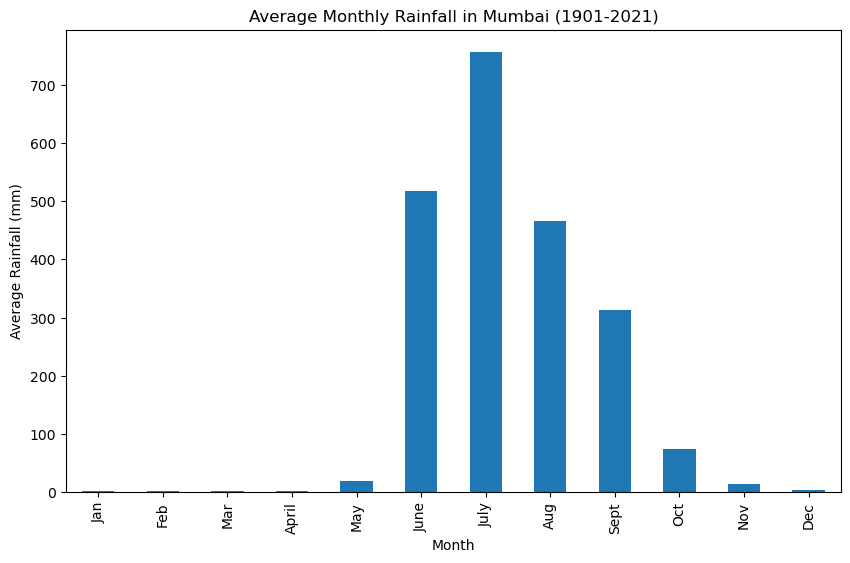

In [16]:
# Monthly Rainfall Analysis
monthly_avg = df.iloc[:, 1:-1].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Rainfall in Mumbai (1901-2021)')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=90)
plt.show()

#### 3.monthly rainfall distribution

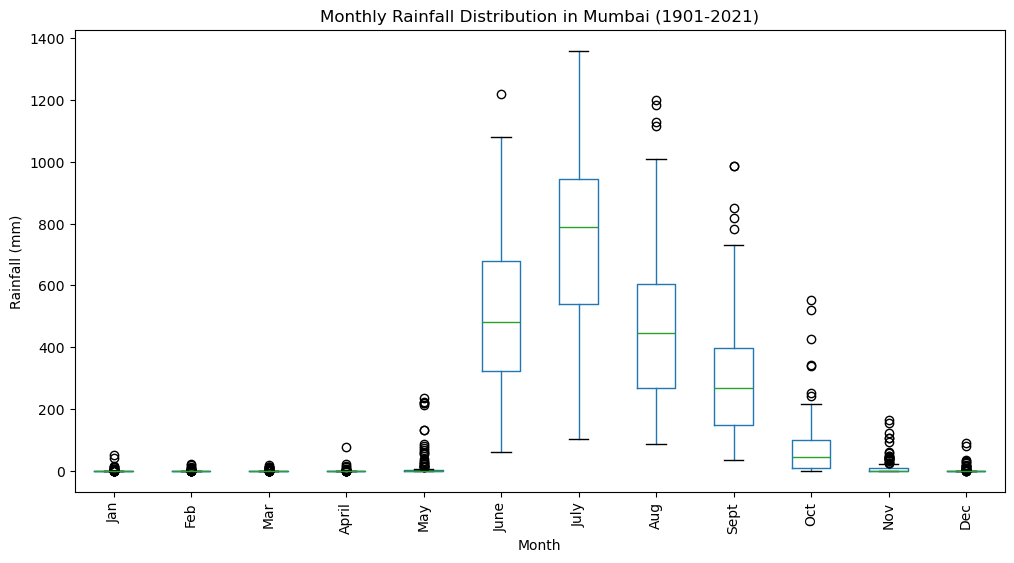

In [17]:
# Box plot for monthly rainfall distribution
monthly_data = df.iloc[:, 1:-1]
plt.figure(figsize=(12, 6))
monthly_data.boxplot()
plt.title('Monthly Rainfall Distribution in Mumbai (1901-2021)')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Average Seasonal Rainfall in Mumbai (1901-2021)

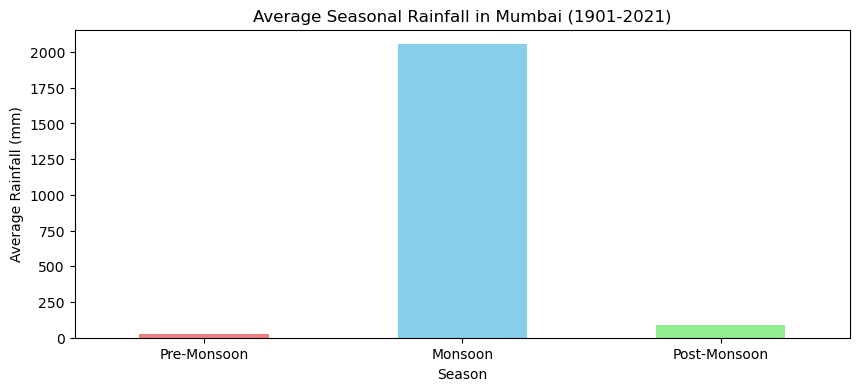

In [18]:
# A bar chart comparing average rainfall for different seasons
seasons = {
    'Pre-Monsoon': df[['Jan', 'Feb', 'Mar', 'April', 'May']].sum(axis=1),
    'Monsoon': df[['June', 'July', 'Aug', 'Sept']].sum(axis=1),
    'Post-Monsoon': df[['Oct', 'Nov', 'Dec']].sum(axis=1)
}
seasonal_data = pd.DataFrame(seasons)
# Bar chart
seasonal_means = seasonal_data.mean()
plt.figure(figsize=(10, 4))
seasonal_means.plot(kind='bar', color=['lightcoral', 'skyblue', 'lightgreen'])
plt.title('Average Seasonal Rainfall in Mumbai (1901-2021)')
plt.ylabel('Average Rainfall (mm)')
plt.xlabel('Season')
plt.xticks(rotation= 0)
plt.show()

Here Average Seasonal Rainfall in Mumbai(1901-2021) Moonsoon Season is higest rain fall in that particular year compare pre-Monsoon & Post- Moonsoon

# Correlation Heatmap

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
correlation_matrix = df.corr()

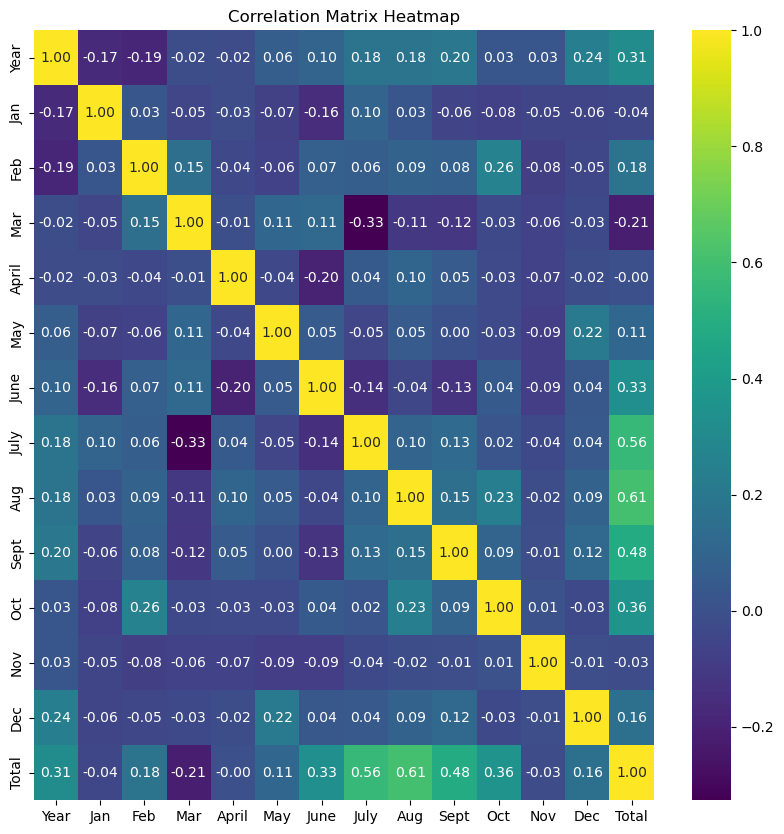

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot =True,cmap= 'viridis', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Analyze the Distribution of the Target Variable

In [23]:
# Select two months for analysis, e.g., July and August
month1 = 'July'
month2 = 'Aug'

In [24]:
# Set up the plot canvas
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

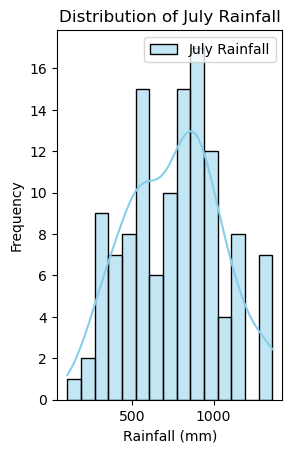

In [25]:
# Plot for the first month
plt.subplot(1, 2, 1)
sns.histplot(df[month1], kde=True, bins=15, color='skyblue', label=f'{month1} Rainfall')
plt.title(f'Distribution of {month1} Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.legend()

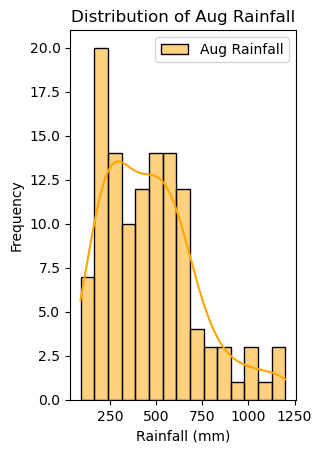

In [26]:
# Plot for the second month
plt.subplot(1, 2, 2)
sns.histplot(df[month2], kde=True, bins=15, color='orange', label=f'{month2} Rainfall')
plt.title(f'Distribution of {month2} Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.legend()

# Encoding Categorical Variables

To convert categorical data into numerical, we will use the one-hot encoding technique. This process involves assigning binary numeric values to each unique class present in columns with categorical data. By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and prediction.

In [27]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [28]:
df_dummies = pd.get_dummies(df)
df_dummies.tail()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
116,2017,0.000000,0.000000,0.000000,0.000000,1.04389,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.00000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.00000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.00000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531
120,2021,0.727235,0.825876,0.010660,0.002233,219.07506,796.307275,981.146645,323.199896,601.247517,36.040432,25.156942,90.044602,3073.784373


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


# Splitting the data into x and y

Now, we partition the dataset into two components: x and y. The variable x encompasses all independent variables, representing the features that contribute to our predictions. On the other hand, y encapsulates the dependent variable or target variable, serving as the outcome we aim to predict.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = df.drop(columns=['Total'])  
y = df['Total']

In [32]:
# Display the shapes of X and y to verify
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (121, 13)
Shape of y: (121,)


# Train-Test Split

We'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.3.We will take Random State as 42. This will guarantee the reproducibility of our results across different runs.

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(84, 13)
(37, 13)
(84,)
(37,)


# Standard Scaler

We will now use Standard Scaler to standardize the features of the dataset. This ensures that the consistency between the features of the dataset is maintained. Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
# Normalize the data for KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
x_train

array([[-0.24456411, -0.21407559,  1.89610513, ..., -0.27192674,
        -0.46983873, -0.15385117],
       [ 1.65973843, -0.23016558, -0.3325067 , ...,  1.14481255,
        -0.46983873,  0.82656216],
       [-1.51409913, -0.23016558, -0.3325067 , ...,  0.07638068,
        -0.18410481, -0.32954609],
       ...,
       [ 0.88070557, -0.23016558, -0.3325067 , ...,  0.23320243,
        -0.02352023, -0.31937415],
       [-0.30227024, -0.23016558, -0.3325067 , ..., -0.12364828,
        -0.46983873, -0.32954609],
       [ 1.16923626, -0.23016558,  0.21309633, ..., -0.66803848,
        -0.46983873, -0.32954609]])

In [40]:
x_test

array([[-5.04241725e-01,  1.73569510e+00, -3.32506700e-01,
        -3.35224749e-01, -2.00382318e-01, -3.41076498e-01,
         2.21320762e-01, -4.57650159e-02,  5.26264517e-01,
        -3.36902363e-01, -6.85147469e-01, -3.63388840e-01,
        -3.29546092e-01],
       [-4.17682519e-01,  4.50675359e-01, -3.32506700e-01,
        -3.35224749e-01, -2.00382318e-01, -3.41076498e-01,
        -1.08010555e+00,  2.01166449e-01, -1.60785410e-01,
        -2.42003548e-02, -5.61494234e-01,  8.61756953e+00,
        -3.29546092e-01],
       [-1.65836447e+00, -1.40772186e-01,  1.45920146e-01,
        -3.35224749e-01, -2.00382318e-01, -3.41076498e-01,
        -1.61845104e+00, -5.67445728e-01, -1.23494003e+00,
        -6.96544977e-01, -6.57320373e-01,  9.07168725e-01,
        -3.29546092e-01],
       [-1.86857969e-01, -2.30165582e-01, -3.32506700e-01,
        -3.35224749e-01, -2.00382318e-01,  8.24810294e-01,
         7.06807534e-01,  3.95081567e-01,  1.12770293e-01,
         1.14001621e+00,  3.06509595e

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = df[~((df< (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking Data set is Balanced or Imbalanced

In [42]:
# Check the distribution of the target variable (e.g., 'Total')
target_column = 'Total'  # Replace with your target column name
class_distribution = df[target_column].value_counts()


In [43]:
# Check if the classes are imbalanced
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"Imbalance Ratio (max class count / min class count): {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:  # Adjust this threshold as necessary
    print("The dataset appears to be imbalanced.")
else:
    print("The dataset appears to be balanced.")

Imbalance Ratio (max class count / min class count): 1.00
The dataset appears to be balanced.


Here Rain Forecasting Data Set is values is Balanced.Next step start the Machine learning Model

# Machine Learning Model

#### 1.RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [46]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred = rf_model.predict(x_test)

In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [49]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 64769.0285
Root Mean Squared Error (RMSE): 254.4976
R² Score: 0.7433


In [50]:
# Optional: Feature importance
feature_importances = rf_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.02511893 0.00278283 0.00668735 0.00863453 0.00454334 0.03150799
 0.08799351 0.28974501 0.35256615 0.11264189 0.05312004 0.01670727
 0.00795116]


#### 2. CatBoost Regressor

In [51]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)

In [53]:
model.fit(x_train, y_train)

In [54]:
y_pred = model.predict(x_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [56]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 36413.65531925808
Root Mean Squared Error: 190.82362358800884
R² Score: 0.8556559662040939


#### 3.KNN Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune 'n_neighbors'

In [59]:
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [60]:
y_pred = knn.predict(x_test_scaled)

In [61]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 85117.29
Root Mean Squared Error (RMSE): 291.75
R² Score: 0.66


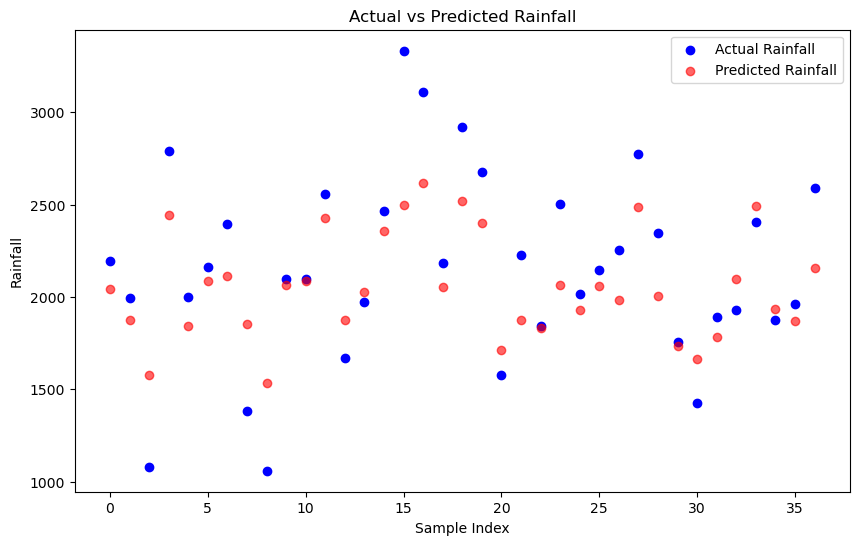

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Rainfall', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Rainfall', color='red', alpha=0.6)
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Sample Index')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

### K-Fold Cross-Validation

##### CatBoostRegressor

In [64]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

In [65]:
# Define the CatBoost Regressor
catboost_model = CatBoostRegressor(
    iterations=500,  # Number of boosting iterations
    learning_rate=0.1,  # Learning rate
    depth=6,  # Tree depth
    verbose=0  # Suppress verbose output
)

In [66]:
# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [67]:
# Define RMSE scoring function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [68]:
# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(catboost_model, x, y, cv=kf, scoring=rmse_scorer)

In [69]:
print("Cross-Validation RMSE scores:", -cv_scores)  # Negate values as they are negative by default
print("Mean RMSE:", -np.mean(cv_scores))
print("Standard Deviation of RMSE:", np.std(-cv_scores))

Cross-Validation RMSE scores: [200.37900886 274.87145887 262.6305035  225.04485704 229.21855494]
Mean RMSE: 238.42887664216482
Standard Deviation of RMSE: 26.927810851744255


# Conculusion

According to this Rain Foreasting Predection. Here i used 3 Type of algorithm.There are RandomForest Regressor, Catboost Regressor,KNN regressor.
here CatBoot Algorithm Is performed Well And I do Cross Check the Cross Validation for  CatBoost Algorithm is working performance Good.
Its R² Score: 0.85 Accuracy Predecting in CatBoost Algorithm Compare between all the algorithm